In [1]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

2.14.0


## Load Data

In [2]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


## Analyze Data

In [3]:
x_train.shape


(50000, 32, 32, 3)

In [4]:
y_train.shape



(50000, 1)

In [23]:
# Notice the labels are in a 1 dimensional array
# Fix this as the labels must either be scalar or one-hot encoded
y_train = y_train.flatten()
y_test = y_test.flatten()
y_train.shape

(50000,)

In [24]:
# Now the labels are scalar
y_train[0]

6

In [7]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [8]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

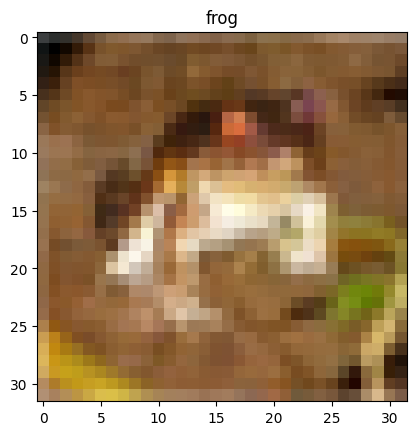

In [9]:
plt.title(labels[y_train[0]])
plt.imshow(x_train[0])


## Numericize Data

In [10]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [11]:
x_train = x_train.astype(float)/255.0
x_test = x_test.astype(float)/255.0


In [12]:
x_train[0]


array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

## Build the Model

In [13]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 21s 5ms/step - loss: 1.5748 - accuracy: 0.4202 - val_loss: 1.3174 - val_accuracy: 0.5207
Epoch 2/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2929 - accuracy: 0.5358 - val_loss: 1.1350 - val_accuracy: 0.5925
Epoch 3/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1619 - accuracy: 0.5870 - val_loss: 1.0564 - val_accuracy: 0.6252
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0689 - accuracy: 0.6195 - val_loss: 1.0121 - val_accuracy: 0.6452
Epoch 5/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9873 - accuracy: 0.6465 - val_loss: 0.9446 - val_accuracy: 0.6650
Epoch 6/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9317 - accuracy: 0.6683 - val_loss: 0.9029 - val_accuracy: 0.6803
Epoch 7/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8783 - accuracy: 0.6866 - val_loss: 0.8824 - val_accuracy

## Analyze the Model

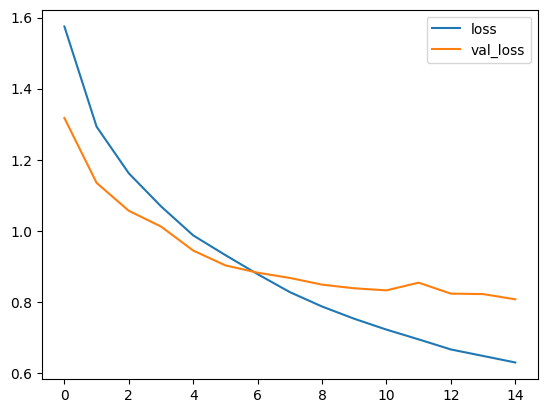

In [25]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

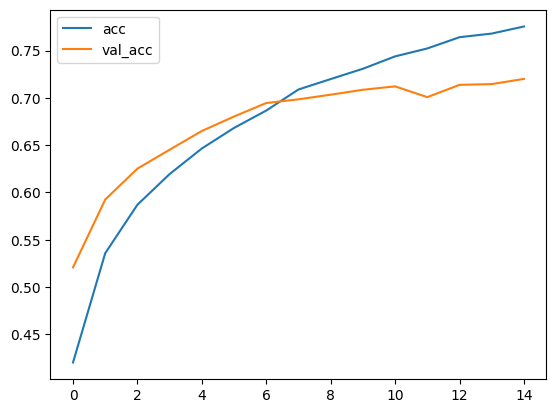

In [26]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 1s 4ms/step
Confusion matrix, without normalization
[[782  21  16  25  30   3   8  13  82  20]
 [ 17 824   3   8   3   2  13   5  27  98]
 [ 86   6 506  80 148  68  54  27  17   8]
 [ 20   9  43 560  82 165  56  36  18  11]
 [ 20   4  35  58 759  29  34  50  11   0]
 [ 11   3  24 207  67 611  20  41   9   7]
 [  6   9  23  65  66  29 781   8   7   6]
 [ 16   1  14  51  92  54   9 753   4   6]
 [ 55  27   1  15  14   5   6   2 848  27]
 [ 41  80   7  18   9  12  10  18  28 777]]


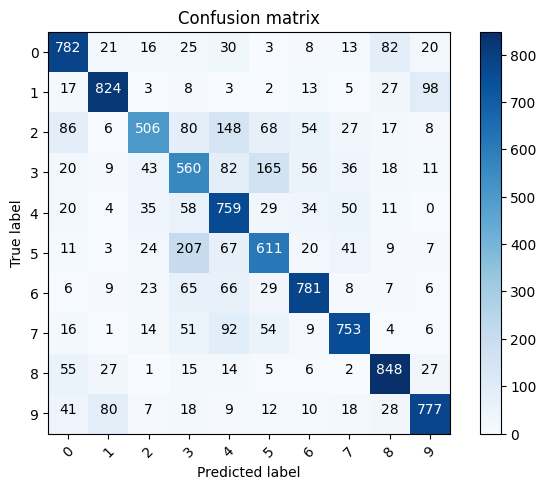

In [27]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

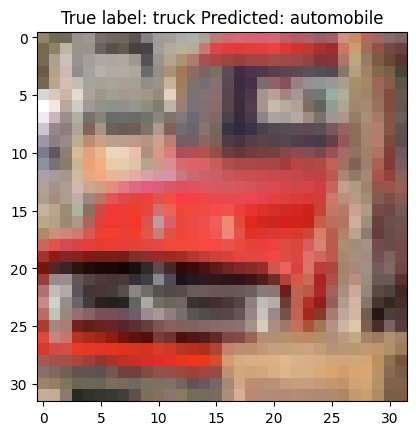

In [28]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));